In [ ]:
!pip install certifi pillow matplotlib torch transformers

In [7]:
import os
import certifi

from PIL import Image
import matplotlib.pyplot as plt

import torch
from transformers import CLIPProcessor, CLIPModel

import warnings
warnings.filterwarnings("ignore")

In [8]:
os.environ['REQUESTS_CA_BUNDLE'] = certifi.where()

In [9]:
tags = ["isometric view", "3D object", "front view", "side view", "top-down"]

In [10]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def isometric_image_tagging(directory):
    for image_file in os.listdir(directory):
        if image_file.endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(directory, image_file)
            image = Image.open(image_path)

            inputs = processor(text=tags, images=image, return_tensors="pt", padding=True)

            with torch.no_grad():
                outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image

            probs = logits_per_image.softmax(dim=1)
            predicted_tag_index = probs.argmax()
            predicted_tag = tags[predicted_tag_index]

            print(f"Image: {image_file}, Predicted tag: {predicted_tag}")
            plt.imshow(image)
            plt.axis("off")
            plt.show()

Image: img-00001.jpg, Predicted tag: isometric view


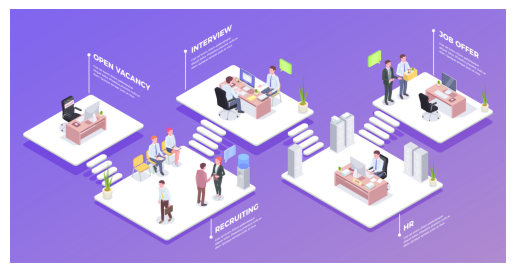

Image: img-00003.jpg, Predicted tag: front view


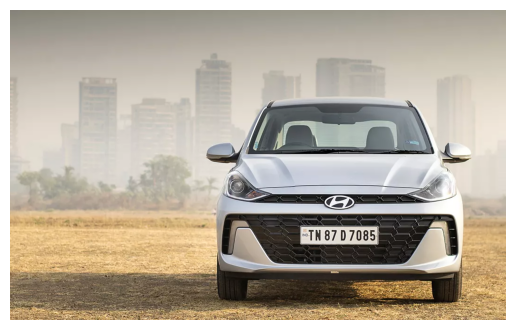

Image: img-00002.jpg, Predicted tag: top-down


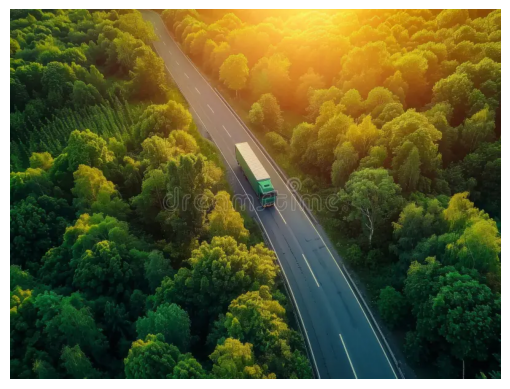

Image: img-00006.jpg, Predicted tag: side view


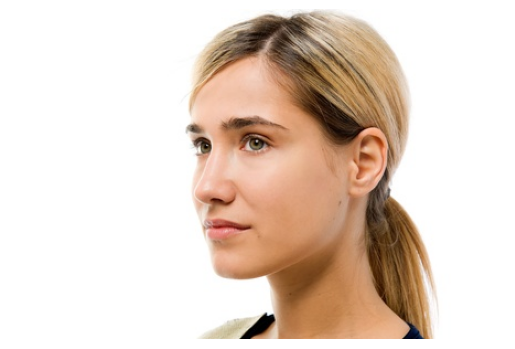

Image: img-00007.jpg, Predicted tag: 3D object


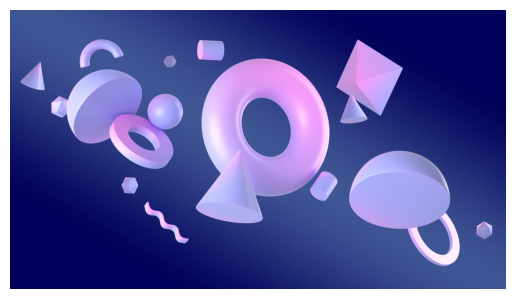

Image: img-00005.jpg, Predicted tag: side view


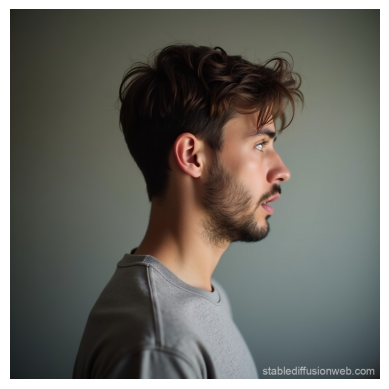

Image: img-00004.jpg, Predicted tag: top-down


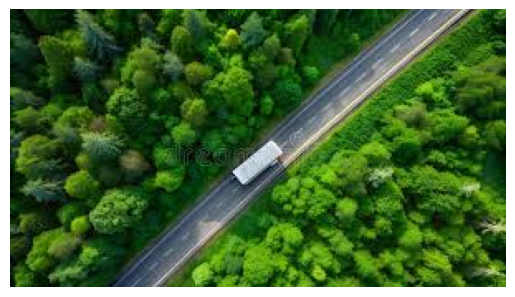

In [12]:
images_dir = 'assets/imgs/'
isometric_image_tagging(images_dir)